# CMB angular power spectrum

The goal of this notebook (work in progress) is to explain the Cosmic Microwave Background angular power spectrum and understand its statistical properties.


## Maps vs power spectra

If we are thinking about anisotropies of the CMB, the simplest picture is to think of a two-dimensional map with hot spots and cold spots, such as the one shown here. The color scale has units of microKelvin and it represents how much the CMB temperature at each point on the sky differs from the average temperature of 2.73 K. The figure uses a [Mollweide projection](https://en.wikipedia.org/wiki/Mollweide_projection) to depict the entire sky (surface of a 2-sphere) as a flat two-dimensional image.

In [8]:
# Set up notebook.
%matplotlib inline
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
import healpy as hp

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


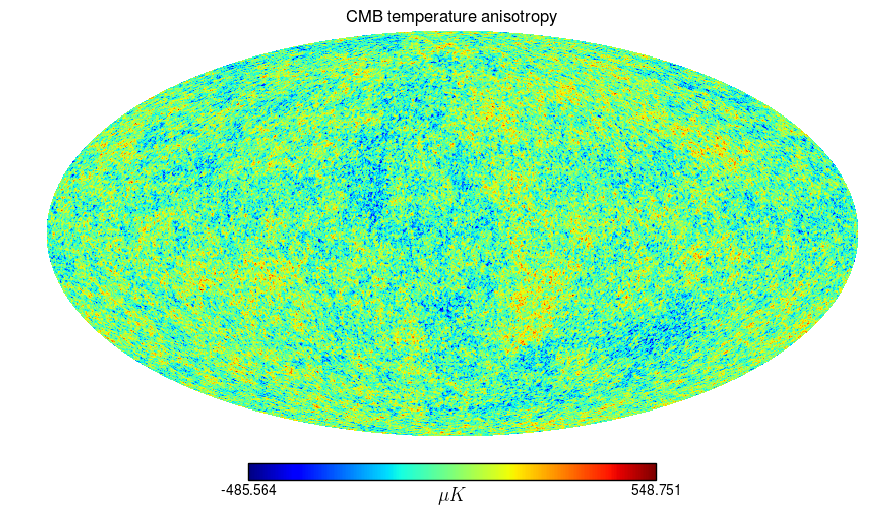

In [9]:
# Read angular power spectrum from file (generated with CAMB via LAMBDA web interface).
Dl = np.genfromtxt('camb_72686694_lensedcls.dat')
# Convert from D_ell to C_ell.
Cl = Dl[:,1] * 2.0 * np.pi / Dl[:,0] / (Dl[:,0] + 1.0)
# Create map and plot.
Tmap = hp.synfast(Cl[0:2048], 512, pol=False, new=True)
hp.mollview(Tmap, unit='$\mu K$', title='CMB temperature anisotropy')


This map has a lot of structure! You can see small hot and cold spots, as well as larger regions that tend to favor hotter or cooler temperatures. The total number of pixels in this map is 3,145,728. You might imagine that any attempt to compare these data with theory might require the theory to make a prediction for the temperature in every pixel.

However, an amazing feature of the CMB is that it can be described by a much smaller amount of information. This is because the individual hot and cold spots themselves are not physically meaningful. Instead we understand the Cosmic Microwave Background as a random realization of an **isotropic Gaussian random field** (we will soon dig into the precise mathematical definition of those terms).

All of the physically meaningful information in the above map is contained in its **angular power spectrum**, plotted below. That angular power spectrum contains just 2048 numbers -- way less than the number of pixels in the map. In the literature, this has been referred to as [Radical Compression of Cosmic Microwave Background Data](https://arxiv.org/abs/astro-ph/9808264).

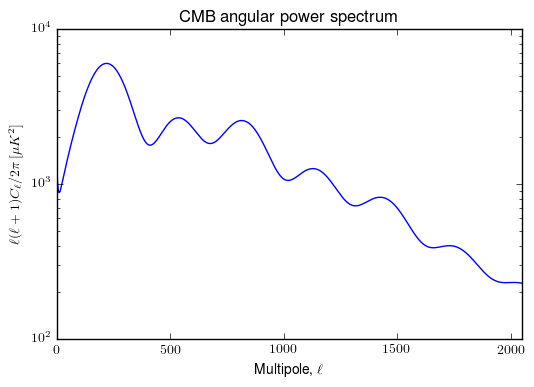

In [12]:
# Plot angular power spectrum.
plt.semilogy(Dl[0:2048,0], Dl[0:2048,1])
plt.xlim([0, 2048])
plt.title('CMB angular power spectrum')
plt.xlabel('Multipole, $\ell$')
plt.ylabel('$\ell (\ell + 1) C_\ell / 2 \pi \, [\mu K^2]$')


The x-axis of this figure represents angular scales, with large angular scales at small multipoles (left-hand side of figure) and small angular scales at large multipoles (right-hand side). The multipoles, $\ell$, refer to [spherical harmonics](https://en.wikipedia.org/wiki/Spherical_harmonics) and $\ell = 180$ roughly corresponds to an angular scale of a degree. For comparison, the diameter of the full moon is about half a degree, so hot spots in the CMB that are the size of the full moon would show up near $\ell = 400$.

The y-axis of this figure represents the **fluctuation power** at each angular scale. Note that this power spectrum is positive-definite. The map, on the other hand, includes equal amounts of positive and negative fluctuations. A useful way to think of the power spectrum is as the square of the fluctuations, so both negative and positive temperature fluctuations will contribute to positive power.

From the shape of the power spectrum, you can see that there are more temperature fluctuations (or larger amplitude temperature fluctuations) at certain angular scales. For instance, the first and largest peak shows up at $\ell \sim 200$. For an even more radical compression of the CMB data, we can describe this angular power spectrum using just six physical parameters -- this is $\Lambda$CDM cosmology. There are a few ways to choose these six parameters, but one option is:

* Density of baryonic matter
* Density of dark matter
* Geometry of the universe (is space-time flat?)
* Amplitude of scalar fluctuations (how much fluctuation power should we see in the CMB and elsewhere?)
* Scalar spectral index (does the amplitude of fluctuations depend on scale?)
* Optical depth to recombination (this has to do with how our view of the CMB is affected by intervening ionized matter)

This description of the CMB is necessary to connect the observations to theory, but we are going to focus on the step of converting a map into an angular power spectrum. The statistics of the map (isotropic, Gaussian) will determine the statistics of the power spectrum (non-Gaussian). We will also extend this operation to handle maps of polarization.